In [2]:
# ============================================
# Sigmoid (Logistic) Regression From Scratch
# Complete Working Solution – All Tasks Solved
# ============================================

# Core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# ------------------------------------------------
# 1. Logistic (Sigmoid) Function
# ------------------------------------------------

def logistic_function(x):
    return 1 / (1 + np.exp(-x))

In [4]:
# Test logistic function

def test_logistic_function():
    x_scalar = 0
    assert round(logistic_function(x_scalar), 3) == 0.5

    x_pos = 2
    assert round(logistic_function(x_pos), 3) == round(1/(1+np.exp(-2)), 3)

    x_neg = -3
    assert round(logistic_function(x_neg), 3) == round(1/(1+np.exp(3)), 3)

    x_array = np.array([0, 2, -3])
    expected = np.array([0.5, 0.881, 0.047])
    assert np.all(np.round(logistic_function(x_array), 3) == expected)

    print("Logistic function tests passed")

test_logistic_function()

Logistic function tests passed


In [5]:
# ------------------------------------------------
# 2. Log Loss Function
# ------------------------------------------------

def log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [6]:
# Test log loss

def test_log_loss():
    assert np.isclose(log_loss(1, 1), 0.0)
    assert np.isclose(log_loss(0, 0), 0.0)

    assert np.isclose(log_loss(1, 0.8), -(np.log(0.8)))
    assert np.isclose(log_loss(0, 0.2), -(np.log(0.8)))

    print("Log loss tests passed")

test_log_loss()


Log loss tests passed


In [7]:
# ------------------------------------------------
# 3. Cost Function (Average Log Loss)
# ------------------------------------------------

def cost_function(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    n = len(y_true)
    loss_vec = log_loss(y_true, y_pred)
    return np.sum(loss_vec) / n

In [8]:
# Test cost function

def test_cost_function():
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])
    expected = (-(np.log(0.9)) - (np.log(0.9)) - (np.log(0.8))) / 3
    assert np.isclose(cost_function(y_true, y_pred), expected)
    print("Cost function test passed")

test_cost_function()

Cost function test passed


In [9]:
# ------------------------------------------------
# 4. Cost Function for Logistic Regression
# ------------------------------------------------

def costfunction_logreg(X, y, w, b):
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    return cost_function(y, y_pred)

In [10]:
# ------------------------------------------------
# 5. Gradient Computation
# ------------------------------------------------

def compute_gradient(X, y, w, b):
    n = X.shape[0]
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)

    error = y_pred - y
    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n

    return grad_w, grad_b

In [11]:
# ------------------------------------------------
# 6. Gradient Descent
# ------------------------------------------------

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=False):
    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b}")

    return w, b, cost_history, params_history

In [12]:
# ------------------------------------------------
# 7. Prediction Function
# ------------------------------------------------

def prediction(X, w, b, threshold=0.5):
    probs = logistic_function(np.dot(X, w) + b)
    return (probs >= threshold).astype(int)

In [13]:
# Test prediction

def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    expected = np.array([0, 1, 1])
    assert np.array_equal(prediction(X_test, w_test, b_test), expected)
    print("Prediction test passed")

test_prediction()

Prediction test passed


In [14]:
# ------------------------------------------------
# 8. Evaluation Metrics
# ------------------------------------------------

def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP], [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

    return confusion_matrix, precision, recall, f1_score


In [15]:
# ------------------------------------------------
# 9. Dataset: Pima Indians Diabetes
# ------------------------------------------------

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
    'BMI','DiabetesPedigreeFunction','Age','Outcome'
]

data = pd.read_csv(url, names=columns)

In [16]:
# Cleaning zeros
to_clean = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
data[to_clean] = data[to_clean].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

In [18]:
# Train-test split
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# ------------------------------------------------
# 10. Training Model
# ------------------------------------------------

w = np.zeros(X_train.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

w, b, cost_history, _ = gradient_descent(
    X_train, y_train, w, b, alpha, n_iter, show_cost=True
)

Iteration 0: Cost = 0.676575
Iteration 100: Cost = 0.465441
Iteration 200: Cost = 0.455913
Iteration 300: Cost = 0.453874
Iteration 400: Cost = 0.453316
Iteration 500: Cost = 0.453148
Iteration 600: Cost = 0.453096
Iteration 700: Cost = 0.453079
Iteration 800: Cost = 0.453074
Iteration 900: Cost = 0.453072
Iteration 999: Cost = 0.453071


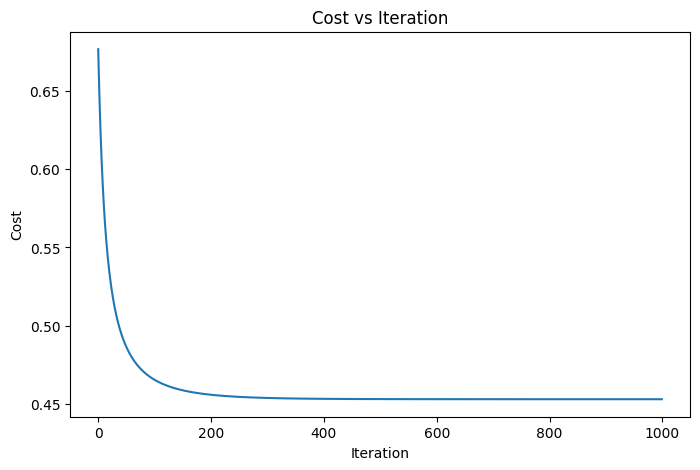

In [21]:
# Plot cost
plt.figure(figsize=(8,5))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()

In [22]:
# ------------------------------------------------
# 11. Evaluation
# ------------------------------------------------

y_train_pred = prediction(X_train, w, b)
y_test_pred = prediction(X_test, w, b)

train_cost = costfunction_logreg(X_train, y_train, w, b)
test_cost = costfunction_logreg(X_test, y_test, w, b)

print(f"Train Cost: {train_cost:.4f}")
print(f"Test Cost: {test_cost:.4f}")

accuracy = np.mean(y_test_pred == y_test) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

cm, precision, recall, f1 = evaluate_classification(y_test, y_test_pred)

print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Train Cost: 0.4531
Test Cost: 0.5146
Test Accuracy: 70.78%
Confusion Matrix:
 [[82 18]
 [27 27]]
Precision: 0.60
Recall: 0.50
F1-score: 0.55
